In [1]:
import os
!pip install shap
import shap
from joblib import load
import pandas as pd

final_datasets_path = "./data_csv/final"
models_path = "./models/5_final_results"

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.0 MB/s 
['gilani-2017_tweets.json', 'gilani-2017.tsv', 'gilani-2017.gsheet', 'pronbots-2019_tweets.json', 'pronbots-2019.tsv', 'vendor-purchased-2019.tsv', 'vendor-purchased-2019_tweets.json', 'celebrity-2019_tweets.json', 'celebrity-2019.tsv', 'political-bots-2019_tweets.json', 'political-bots-2019.tsv', 'verified-2019.tsv', 'verified-2019_tweets.json', 'botometer-feedback-2019_tweets.json', 'botometer-feedback-2019.tsv', 'botwiki-2019.tsv', 'botwiki-2019_tweets.json', 'screen_names_0930.json', 'varol-17-wollh.csv', 'cresci-17-wollh.csv', 'screen_names.json', 'screen_names_all_train_datasets.json', 'bigram_probs.json', 'results.csv', '1101011.joblib', 'botwiki-verified.csv', 'midterm-2018.csv', 'gilani-2017.csv', 'cresci-rtbust-2019.csv', '0101000.joblib', 'pronbots-2019.csv', 'cresci-17.csv', 'mean_results.csv', 

In [2]:
M196 = load(models_path + '/1101011.joblib') #M196 is the best model from their paper
explainer = shap.TreeExplainer(M196)

In [4]:
#combining all test data
botwiki = pd.read_csv(final_datasets_path + '/botwiki-verified.csv')
midterm = pd.read_csv(final_datasets_path + '/midterm-2018.csv')
gilani = pd.read_csv(final_datasets_path + '/gilani-2017.csv')
c_rtbust = pd.read_csv(final_datasets_path + '/cresci-rtbust-2019.csv')

column_number = len(botwiki.columns)
X_test_botwiki = botwiki.iloc[:, 0:column_number - 1]
X_test_midterm = midterm.iloc[:, 0:column_number - 1]
X_test_gilani = gilani.iloc[:, 0:column_number - 1]
X_test_rtbust = c_rtbust.iloc[:, 0:column_number - 1]
X_test = pd.concat([X_test_botwiki, X_test_midterm, X_test_gilani, X_test_rtbust], axis=0, ignore_index=True)
X_test

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,profile_use_background_image,verified,tweet_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,screen_name_likelihood
0,3792,23,8,2,1,False,False,False,0.342880,0.002080,0.000723,0.000181,0.000090,2.875000,11,0,27,0,80,0.001353
1,407226,322,8,34,21,False,True,False,9.232840,0.007301,0.000181,0.000771,0.000476,40.250000,13,0,14,0,160,0.003249
2,15668,171,86,1933,32,True,True,False,0.406948,0.004441,0.002234,0.050206,0.000831,1.988372,13,0,13,0,156,0.001441
3,5087,3374,9,15,146,True,True,False,0.166329,0.110319,0.000294,0.000490,0.004774,374.888889,9,0,9,0,135,0.002680
4,2813,7,2,1,4,False,False,False,0.133028,0.000331,0.000095,0.000047,0.000189,3.500000,13,0,13,0,52,0.002786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56395,2134,152,46,1002,0,True,True,False,0.056783,0.004045,0.001224,0.026662,0.000000,3.304348,7,0,14,0,0,0.003875
56396,3938,301,863,546,0,True,True,False,0.196439,0.015015,0.043049,0.027236,0.000000,0.348783,10,1,10,0,54,0.001289
56397,6858,35,33,6953,26,True,True,False,0.273925,0.001398,0.001318,0.277720,0.001039,1.060606,15,2,15,2,0,0.002093
56398,12439,134,155,13631,1,True,True,False,0.467315,0.005034,0.005823,0.512097,0.000038,0.864516,11,0,5,0,59,0.002231


In [5]:
shap_values = explainer.shap_values(X_test)
shap_values

[array([[ 0.00021929, -0.03426268, -0.04302217, ...,  0.00030129,
          0.01267235,  0.0021035 ],
        [-0.02600606,  0.00590703, -0.06385438, ...,  0.00068912,
         -0.01431478,  0.01163807],
        [ 0.01569359, -0.00741914,  0.02592155, ...,  0.0004818 ,
         -0.02932154,  0.0113108 ],
        ...,
        [ 0.00625571, -0.05008009, -0.06128906, ..., -0.00975491,
          0.00472658,  0.01586327],
        [ 0.01910638,  0.00343631,  0.03944549, ...,  0.00058313,
          0.00549557,  0.00443241],
        [ 0.02562295, -0.00099524,  0.04122202, ...,  0.0005794 ,
         -0.00287192,  0.0084713 ]]),
 array([[-0.00021929,  0.03426268,  0.04302217, ..., -0.00030129,
         -0.01267235, -0.0021035 ],
        [ 0.02600606, -0.00590703,  0.06385438, ..., -0.00068912,
          0.01431478, -0.01163807],
        [-0.01569359,  0.00741914, -0.02592155, ..., -0.0004818 ,
          0.02932154, -0.0113108 ],
        ...,
        [-0.00625571,  0.05008009,  0.06128906, ...,  

In [6]:
# We decided to put the results of shap analysis into csv files because it takes 20 minutes to run
import csv
shapposname = 'shap_values_0.csv'
shapnegname = 'shap_values_1.csv'
with open(shapposname, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                            quoting=csv.QUOTE_MINIMAL)
    for row in shap_values[0]:
        writer.writerow(row)
with open(shapnegname, 'w', newline='') as csvfile:
    writer2 = csv.writer(csvfile, delimiter=',',
                            quoting=csv.QUOTE_MINIMAL)
    for row in shap_values[1]:
        writer2.writerow(row)

In [7]:
print(shap_values[0].shape)
print(shap_values[1].shape)

(56400, 20)
(56400, 20)


In [8]:
# To see the value of each matrix, you can run the following line
# shap.summary_plot(shap_values, X_test, plot_type="bar")

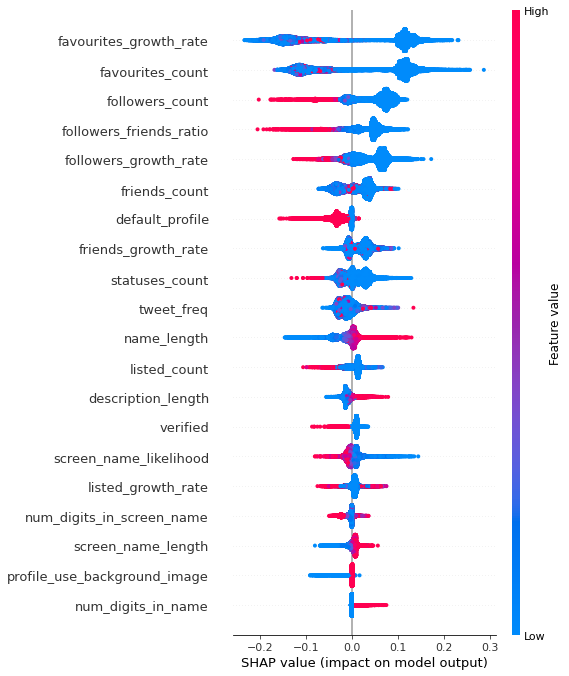

In [9]:
shap.summary_plot(shap_values[1], X_test, plot_type="dot")
# This is the shap analysis of M196


In [11]:
# run this to see SHAP analysis of M196 if you have shap_values_1.csv already
# import pandas as pd
# df = pd.read_csv ('shap_values_1.csv',header=None)
# print(df.values)
# print(df.shape)
# shap.summary_plot(df.values, X_test, plot_type="dot")

In [ ]:
Mbest = load(models_path + '/0101000.joblib') # our best model
best_explainer = shap.TreeExplainer(Mbest)

best_shap_values = best_explainer.shap_values(X_test)

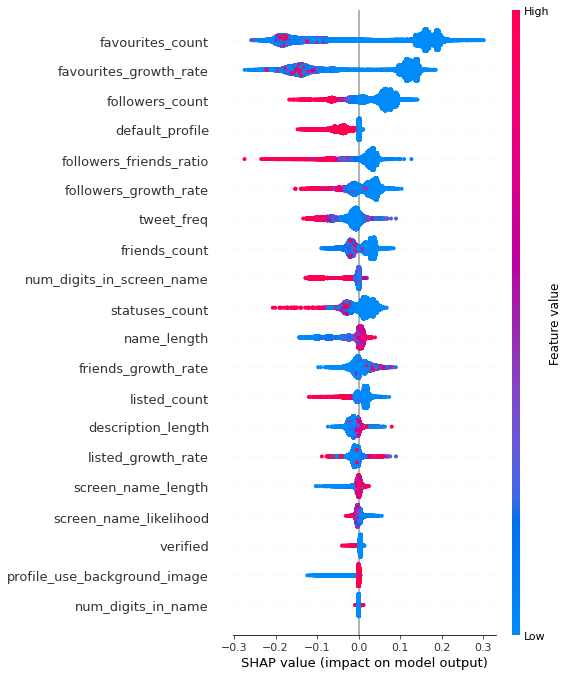

In [ ]:
#our best model
shap.summary_plot(best_shap_values[1], X_test, plot_type="dot")